## Final Pipeline

Dataset ready for testing with corrected preprocess function.
Shape of mask tensor inside loop: (1, 128, 128, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


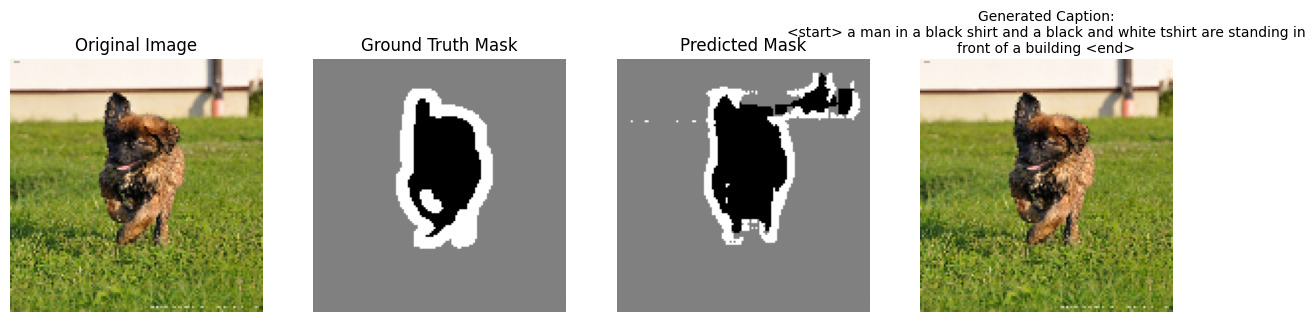

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load Oxford Pets Dataset (Corrected)
dataset, info = tfds.load("oxford_iiit_pet", with_info=True)
IMG_SIZE = 128

def preprocess(sample):
    image = tf.cast(sample["image"], tf.float32) / 255.0
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

    mask = tf.cast(sample["segmentation_mask"], tf.int32)
    mask = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE), method='nearest')
    return image, mask

# Re-define the test dataset with the corrected function
test = dataset["test"].map(preprocess).batch(1)
print("Dataset ready for testing with corrected preprocess function.")


# Run Final Pipeline (Unchanged, but will now work)
def run_final_pipeline():
    for img, mask in test.take(1):
        print("Shape of mask tensor inside loop:", mask.shape) # Should now be (1, 128, 128, 1)
        
        # Segmentation Prediction
        pred_mask = segmentation_model.predict(img)
        pred_mask = tf.argmax(pred_mask, axis=-1)[0]

        # Caption Generation
        photo_features = preprocess_for_captioning(img[0])
        caption = generate_caption(caption_model, tokenizer, photo_features, max_length)

        # Show results
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 4, 1)
        plt.title("Original Image")
        plt.imshow(img[0])
        plt.axis("off")

        plt.subplot(1, 4, 2)
        plt.title("Ground Truth Mask")
        plt.imshow(tf.squeeze(mask[0]).numpy(), cmap="gray")
        plt.axis("off")

        plt.subplot(1, 4, 3)
        plt.title("Predicted Mask")
        plt.imshow(pred_mask, cmap="gray")
        plt.axis("off")

        plt.subplot(1, 4, 4)
        plt.title(f"Generated Caption:\n{caption}", fontsize=10, wrap=True)
        plt.imshow(img[0])
        plt.axis("off")

        plt.show()

# Test Final Pipeline
run_final_pipeline()